# Quick Start: Explore two examples of what geqo can do
In the following, two simple examples are presented to show how geqo can be used to define, simulate and visualize quantum circuits.

## Simulation of the EPR pair generation
First, the necessary gates for an EPR state preparation are imported and a circuit is contructed with the ```Sequence``` class. 
This class is used in geqo to define quantum circuits. It keeps track of all classical bits, qubits and operations with their corresponding target bits and qubits in the circuit.

The first two arguments of ```Sequence``` are the lists of qubits and classical bits in the circuit. The identifiers can be numbers or strings, but all identifiers in a list must be of the same type. The third argument is the list of operations in the circuits. Each entry in the latter list consists of the gate and its targets. In this example, the gates have no parameters like rotation angles.

In [1]:
from geqo.gates import Hadamard, CNOT
from geqo.core.quantum_circuit import Sequence

seq = Sequence(
    ["q0", "q1"], ["c0", "c1"], [(Hadamard(), ["q0"], []), (CNOT(), ["q0", "q1"], [])]
)

After defining a quantum circuit, the execution of the circuit can be simulated. Here, we use the simulator ```simulatorStatevectorNumpy```, which is a numerical-based simulator for the state vector of the system. The first and second argument are the number of classical and quantum bits of the simulated system, respectively. The bits are initialized with $0$ and the qubits with $|0\rangle$. The state vectors $|0\rangle$ and $|1\rangle$ are internally represented by the vectors $(1,0)^T\in {\mathbb C}^2$ and $(0,1)^T \in {\mathbb C}^2$ of the standard basis. The simulation is done with the method ```apply``` and its arguments are the quantum operation to be simulated and a list of its target qubits and a list of its classical target bits. If an operation does not work on classical bits then the list of classical bits can be omitted.

In [2]:
from geqo.simulators.numpy import simulatorStatevectorNumpy

sim = simulatorStatevectorNumpy(2, 2)
sim.apply(seq, [0, 1], [0, 1])
sim.state

array([[0.70710678+0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.70710678+0.j]])

For visualization, geqo supports several methods. In the following example, a matplotlib based visualizer is used to draw a diagram of the circuit.

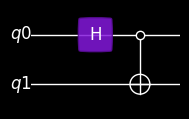

In [3]:
from geqo.visualization import plot_mpl

plot_mpl(seq, backend=sim, style="jos_dark")

## Example: Gates with parameters
Several gates have parameters like rotation angles. The following example shows how to define such an operation. Note that the angle in the circuit definition is a name only, i.e. it is a character string.

In [1]:
from geqo.gates import Ry
from geqo.core.quantum_circuit import Sequence

seq = Sequence(["q0"], [], [(Ry("φ"), ["q0"], [])])
print(seq)

Sequence(['q0'], [], [(Ry("φ"), ['q0'], [])])


In order to simulate a circuit with a parameterized gate it is necessary to initialize the simulator before simulating the gate. This can be done with the method ```setValue``` and the values can be adapted to the different backends, e.g. the value for a SymPy based symbolic simulator might be a symbolic expression.

In [2]:
from geqo.simulators.numpy import simulatorStatevectorNumpy

sim = simulatorStatevectorNumpy(2, 2)
sim.setValue("φ", 0.4)
sim.apply(seq, [0])
sim.state

array([[0.98006658+0.j],
       [0.        +0.j],
       [0.19866933+0.j],
       [0.        +0.j]])